Виконати детекцію границь на зображеннях за допомогою операторів Canny.
Провести порівняльний аналіз.

In [46]:
from PIL import Image
import math
import numpy as np

In [47]:
path = "C:/Users/maksy/Downloads/cv labs"

In [48]:
im = Image.open("1.jpg") # Can be many different formats.


im = im.convert(mode='L')
pix = im.load()

In [49]:
im.size  # Get the width and hight of the image for iterating over


(600, 600)

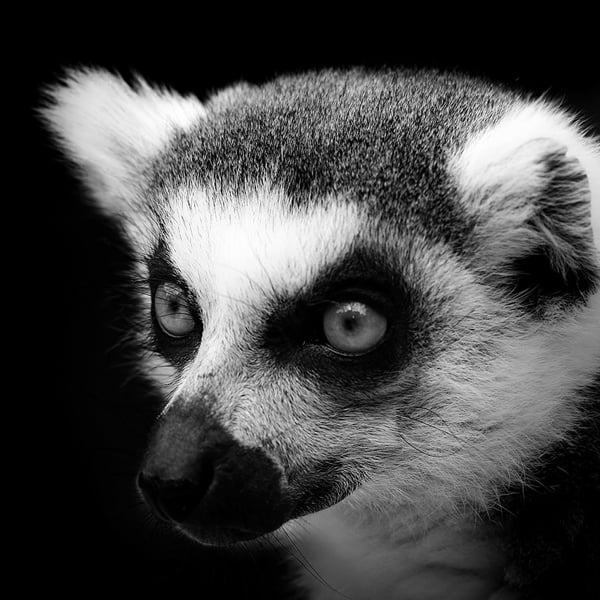

In [50]:
im

In [51]:
width, height = im.size
pixel_values = list(im.getdata())

In [52]:
def Gaussian_Core(size, sigma= 1.4):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    H =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) / (2.0 * np.pi * sigma**2) #formula from lecture
    return H

In [53]:
new = Gaussian_Core(5)

In [54]:
new

array([[0.01054991, 0.02267864, 0.0292689 , 0.02267864, 0.01054991],
       [0.02267864, 0.04875119, 0.06291796, 0.04875119, 0.02267864],
       [0.0292689 , 0.06291796, 0.0812015 , 0.06291796, 0.0292689 ],
       [0.02267864, 0.04875119, 0.06291796, 0.04875119, 0.02267864],
       [0.01054991, 0.02267864, 0.0292689 , 0.02267864, 0.01054991]])

In [55]:
from scipy import signal

In [56]:
new_image = signal.convolve(im, new)

In [57]:
new_image

array([[-1.95761459e-15, -2.21812553e-15, -2.63061897e-15, ...,
        -1.34350686e-15, -1.76020013e-15, -1.78058627e-15],
       [-1.76962749e-14, -1.83880733e-14, -2.00000792e-14, ...,
        -1.33866796e-14, -1.45062052e-14, -1.58941101e-14],
       [-3.67646044e-14, -3.72591391e-14, -3.88052559e-14, ...,
        -3.75525522e-14, -3.67442210e-14, -3.53404298e-14],
       ...,
       [ 1.08778477e-14,  5.81145287e-15,  2.23517418e-15, ...,
         3.07736162e-01,  1.96845249e-01,  6.24974531e-02],
       [-1.59442425e-14, -1.72853470e-14, -1.85519457e-14, ...,
         1.63616697e-01,  1.04658384e-01,  3.32285514e-02],
       [-1.22934580e-14, -1.18836761e-14, -1.08778477e-14, ...,
         5.19475422e-02,  3.32285514e-02,  1.05499109e-02]])

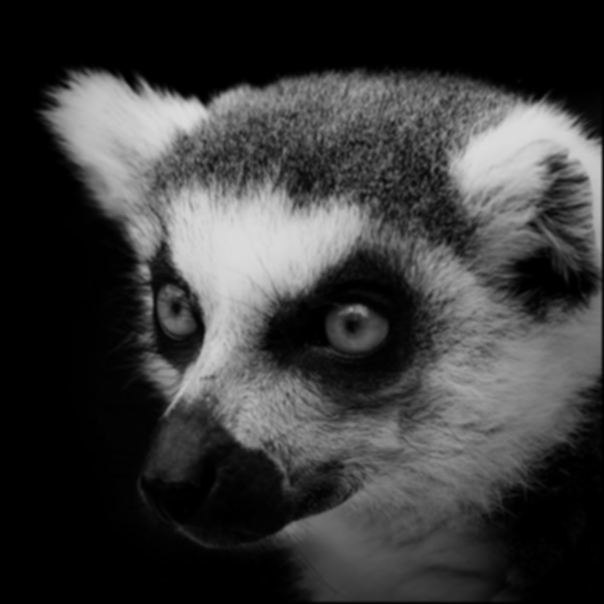

In [58]:
array = np.array(new_image, dtype=np.uint8)

Image.fromarray(array)

In [59]:
Gx = np.asarray([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

Gy = np.asarray([[1, 2, 1], 
                 [0, 0, 0],
                 [-1, -2, -1]])

In [60]:
intensity_gradient_x = signal.convolve(new_image, Gx)

In [61]:
Gy

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

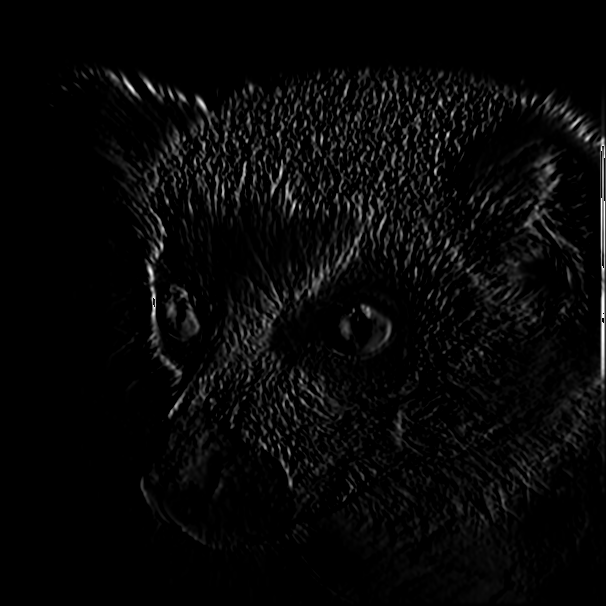

In [62]:
array = np.array(intensity_gradient_x, dtype=np.uint8)

Image.fromarray(array)

In [63]:
intensity_gradient_y  = signal.convolve(new_image, Gy)

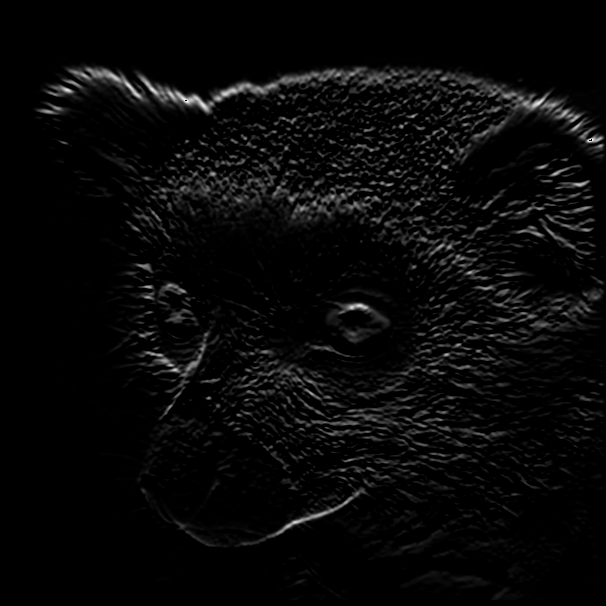

In [64]:
array = np.array(intensity_gradient_y, dtype=np.uint8)

Image.fromarray(array)

In [65]:
def magnitude(Gx, Gy):
    return np.hypot(Gx, Gy)

In [66]:
magnitude(intensity_gradient_x, intensity_gradient_y)

array([[8.73326363e-14, 9.46280203e-14, 9.82996998e-14, ...,
        3.66073927e-14, 3.90967102e-14, 4.11340660e-14],
       [1.19200566e-13, 1.63891841e-13, 1.86759021e-13, ...,
        1.09898183e-13, 1.05295808e-13, 8.12337999e-14],
       [8.10639805e-14, 7.55643218e-14, 5.68889111e-14, ...,
        1.97379934e-13, 1.68171861e-13, 1.07787406e-13],
       ...,
       [1.03212568e-13, 5.91260726e-14, 5.60792685e-14, ...,
        8.38359664e-01, 5.14418726e-01, 1.48862498e-01],
       [1.45393819e-13, 8.99255004e-14, 6.51095305e-14, ...,
        4.58709876e-01, 2.41993843e-01, 6.36844468e-02],
       [5.44617702e-14, 2.92912381e-14, 2.31975166e-14, ...,
        1.35436485e-01, 6.36844468e-02, 1.49198271e-02]])

In [67]:
magnitude_threshold = magnitude(intensity_gradient_x, intensity_gradient_y)

In [68]:
magnitude_threshold = magnitude_threshold / magnitude_threshold.max() * 255
theta = np.arctan2(intensity_gradient_y, intensity_gradient_x)

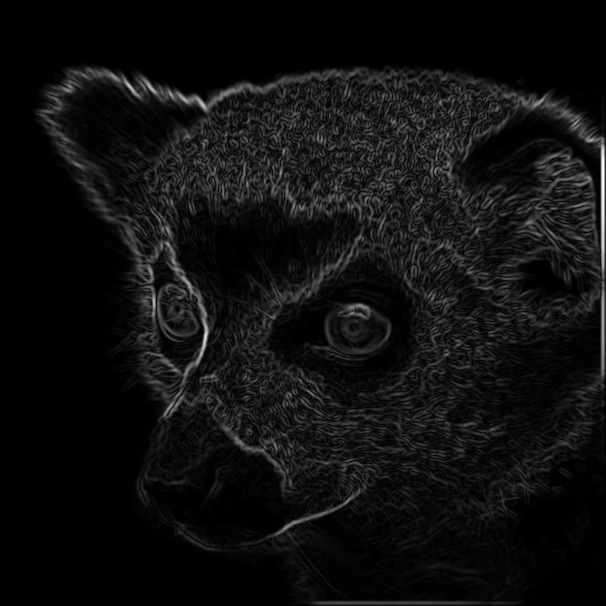

In [69]:
array = np.array(magnitude_threshold, dtype=np.uint8)

Image.fromarray(array)

In [70]:
h_k = magnitude_threshold.max()*0.09
l_k = magnitude_threshold.max()*0.09*0.05

In [71]:
high = np.where(magnitude_threshold >= magnitude_threshold.max()*0.09, 255, 0)
low = np.where(magnitude_threshold < l_k, 255, 0)


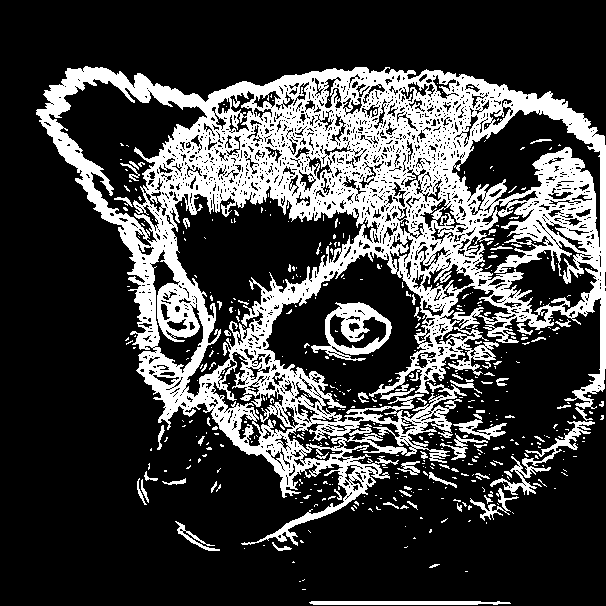

In [72]:
array = np.array(high, dtype=np.uint8)

im_b_f = Image.fromarray(array)
im_b_f

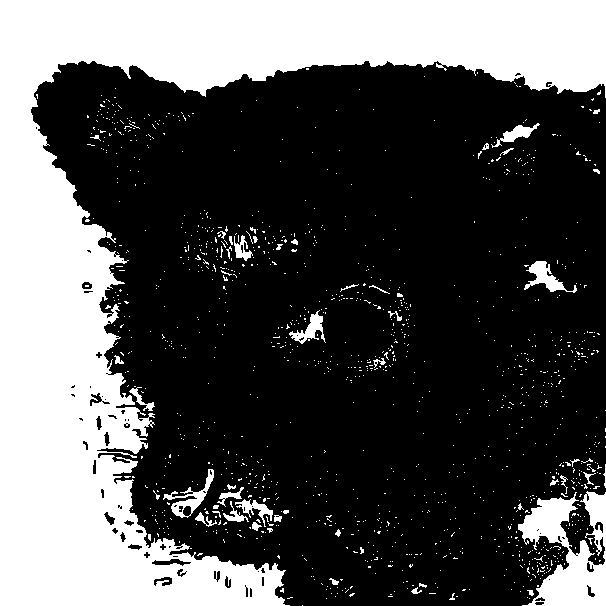

In [73]:
array = np.array(low, dtype=np.uint8)

im_b_f = Image.fromarray(array)
im_b_f

In [74]:

def hysteresis(image, weak=200):
    image_row, image_col = image.shape
 
    top_to_bottom = image.copy()
 

    for row in range(1, image_row):
        for col in range(1, image_col):
            if top_to_bottom[row, col] == weak:
                if top_to_bottom[row, col + 1] == 255 or top_to_bottom[row, col - 1] == 255 or top_to_bottom[row - 1, col] == 255 or top_to_bottom[
                    row + 1, col] == 255 or top_to_bottom[
                    row - 1, col - 1] == 255 or top_to_bottom[row + 1, col - 1] == 255 or top_to_bottom[row - 1, col + 1] == 255 or top_to_bottom[
                    row + 1, col + 1] == 255:
                    top_to_bottom[row, col] = 255
                else:
                    top_to_bottom[row, col] = 0
 
    bottom_to_top = image.copy()
 
    for row in range(image_row - 1, 0, -1):
        for col in range(image_col - 1, 0, -1):
            if bottom_to_top[row, col] == weak:
                if bottom_to_top[row, col + 1] == 255 or bottom_to_top[row, col - 1] == 255 or bottom_to_top[row - 1, col] == 255 or bottom_to_top[
                    row + 1, col] == 255 or bottom_to_top[
                    row - 1, col - 1] == 255 or bottom_to_top[row + 1, col - 1] == 255 or bottom_to_top[row - 1, col + 1] == 255 or bottom_to_top[
                    row + 1, col + 1] == 255:
                    bottom_to_top[row, col] = 255
                else:
                    bottom_to_top[row, col] = 0
 
    right_to_left = image.copy()
 
    for row in range(1, image_row):
        for col in range(image_col - 1, 0, -1):
            if right_to_left[row, col] == weak:
                if right_to_left[row, col + 1] == 255 or right_to_left[row, col - 1] == 255 or right_to_left[row - 1, col] == 255 or right_to_left[
                    row + 1, col] == 255 or right_to_left[
                    row - 1, col - 1] == 255 or right_to_left[row + 1, col - 1] == 255 or right_to_left[row - 1, col + 1] == 255 or right_to_left[
                    row + 1, col + 1] == 255:
                    right_to_left[row, col] = 255
                else:
                    right_to_left[row, col] = 0
 
    left_to_right = image.copy()
 
    for row in range(image_row - 1, 0, -1):
        for col in range(1, image_col):
            if left_to_right[row, col] == weak:
                if left_to_right[row, col + 1] == 255 or left_to_right[row, col - 1] == 255 or left_to_right[row - 1, col] == 255 or left_to_right[
                    row + 1, col] == 255 or left_to_right[
                    row - 1, col - 1] == 255 or left_to_right[row + 1, col - 1] == 255 or left_to_right[row - 1, col + 1] == 255 or left_to_right[
                    row + 1, col + 1] == 255:
                    left_to_right[row, col] = 255
                else:
                    left_to_right[row, col] = 0
 
    final_image = top_to_bottom + bottom_to_top + right_to_left + left_to_right
 
    final_image[final_image > 255] = 255
 
    return final_image

In [75]:
a = hysteresis(high)

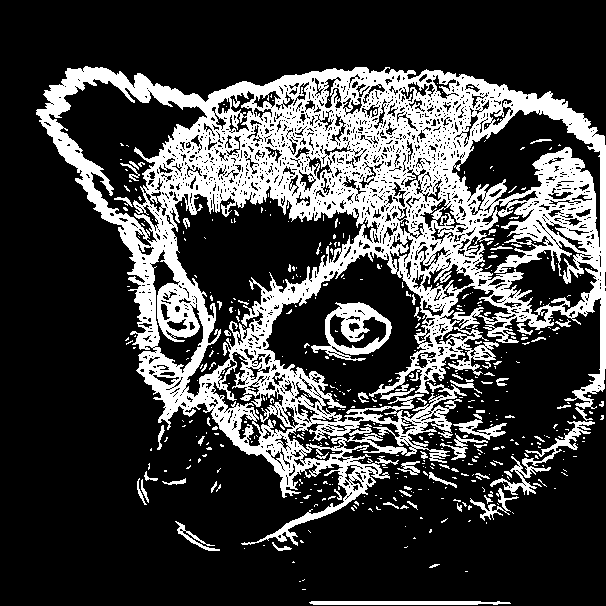

In [76]:
array = np.array(a, dtype=np.uint8)

Image.fromarray(array)